In [27]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import numpy as np

In [5]:
df = pd.read_csv('../data/boston_housing.csv')

In [6]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [7]:
X = df.iloc[:, :-1]
y = df['PRICE']

X = (X - X.mean())/X.std()

lreg = LinearRegression()
lreg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [9]:
coeffs = pd.DataFrame({
    'Variable': X.columns,
    'Weight'  : lreg.coef_
}).sort_values(by='Weight', ascending=False)

coeffs

,Variable,Weight
5,RM,2.676877
8,RAD,2.664852
1,ZN,1.082639
11,B,0.850109
3,CHAS,0.682414
2,INDUS,0.141039
6,AGE,0.019485
0,CRIM,-0.929065
4,NOX,-2.058754
10,PTRATIO,-2.062646


In [10]:
lreg.score(X, y)

0.7406426641094095

In [12]:
df['PREDICTION'] = lreg.predict(X)

In [13]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE,PREDICTION
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,30.003843
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,25.025562
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,30.567597
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,28.607036
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,27.943524


In [11]:
import seaborn as sns

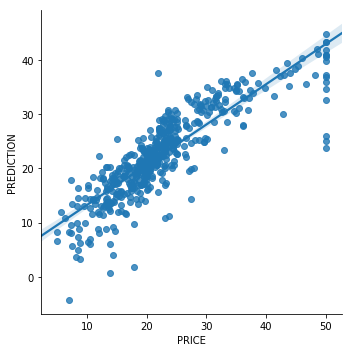

In [15]:
sns.lmplot(x='PRICE', y='PREDICTION', data=df);

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2019)

In [17]:
X_train.shape

(404, 13)

In [18]:
X_test.shape

(102, 13)

In [19]:
y_train.shape

(404,)

In [20]:
y_test.shape

(102,)

In [22]:
lreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [23]:
print("Training score: ", lreg.score(X_train, y_train), "Test score: ", lreg.score(X_test, y_test))

Training score:  0.7581321815069204 Test score:  0.617406599912789


In [32]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(estimator=lreg, X=X_train, y=y_train, cv=10)

In [31]:
scores

array([ 5.48514917e-01,  8.67929496e-01, -2.62774894e+00,  7.43657694e-01,
        6.66054368e-01,  9.05493940e-01,  1.68800642e-02,  4.18507152e-01,
        2.79323867e-01,  7.29721831e-01,  8.90831895e-01, -1.83941841e+00,
        1.97510555e-01,  5.99082162e-01,  9.49188194e-01,  6.98015997e-01,
       -7.71876564e-02,  8.84182683e-01,  8.85971725e-01,  6.58019570e-01,
        8.26081235e-01,  8.10208905e-01,  9.63960883e-01,  7.45501952e-01,
       -9.86994286e+00,  7.13559423e-01,  7.19296791e-01,  8.87560647e-01,
        6.01508832e-01,  6.58583755e-01,  6.96333629e-01, -1.06024325e+00,
        6.78691972e-01,  4.09342012e-01,  7.81482139e-01,  5.45181526e-01,
        8.75997879e-01,  5.12425174e-01,  5.35962118e-03,  9.21854813e-01,
        8.50549276e-01,  5.48499374e-01, -2.98494225e-01, -6.93637260e+00,
        6.94130797e-01,  8.43250066e-01,  4.98929193e-01,  8.20995780e-01,
       -7.24327014e-01,  5.62387387e-01,  8.27639093e-01,  6.25099200e-01,
        8.83037435e-01,  

In [28]:
np.mean(scores)

0.7275668192780949

In [29]:
np.std(scores)

0.07839580317172444

In [33]:
X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.419367,0.284548,-1.286636,-0.272329,-0.144075,0.413263,-0.119895,0.140075,-0.981871,-0.665949,-1.457558,0.440616,-1.074499
1,-0.416927,-0.487240,-0.592794,-0.272329,-0.739530,0.194082,0.366803,0.556609,-0.867024,-0.986353,-0.302794,0.440616,-0.491953
2,-0.416929,-0.487240,-0.592794,-0.272329,-0.739530,1.281446,-0.265549,0.556609,-0.867024,-0.986353,-0.302794,0.396035,-1.207532
3,-0.416338,-0.487240,-1.305586,-0.272329,-0.834458,1.015298,-0.809088,1.076671,-0.752178,-1.105022,0.112920,0.415751,-1.360171
4,-0.412074,-0.487240,-1.305586,-0.272329,-0.834458,1.227362,-0.510674,1.076671,-0.752178,-1.105022,0.112920,0.440616,-1.025487
5,-0.416631,-0.487240,-1.305586,-0.272329,-0.834458,0.206892,-0.350810,1.076671,-0.752178,-1.105022,0.112920,0.410165,-1.042291
6,-0.409837,0.048724,-0.476182,-0.272329,-0.264892,-0.388027,-0.070159,0.838414,-0.522484,-0.576948,-1.503749,0.426376,-0.031237
7,-0.403297,0.048724,-0.476182,-0.272329,-0.264892,-0.160307,0.977841,1.023625,-0.522484,-0.576948,-1.503749,0.440616,0.909800
8,-0.395543,0.048724,-0.476182,-0.272329,-0.264892,-0.930285,1.116390,1.086122,-0.522484,-0.576948,-1.503749,0.328123,2.419379
9,-0.400333,0.048724,-0.476182,-0.272329,-0.264892,-0.399413,0.615481,1.328320,-0.522484,-0.576948,-1.503749,0.329000,0.622728


In [35]:
y_log = np.log1p(y)

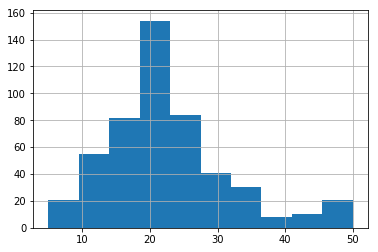

In [38]:
y.hist()

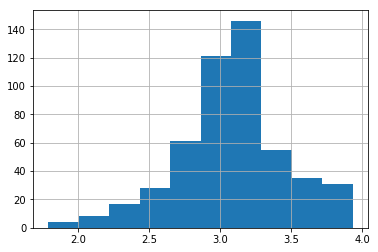

In [37]:
y_log

In [39]:
lreg.predict(X)[:1]

array([30.18876082])

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y_log, test_size=0.2, random_state=2019)

In [42]:
scores = cross_val_score(estimator=lreg, X=X_train, y=y_train, cv=10)

In [43]:
scores

array([0.81066965, 0.78080019, 0.78969268, 0.72301188, 0.72305225,
       0.81510248, 0.84755808, 0.81720277, 0.69862075, 0.79529768])

In [44]:
np.mean(scores)

0.7801008400068825

In [45]:
np.std(scores)

0.046435688027733464

In [48]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.419367,0.284548,-1.286636,-0.272329,-0.144075,0.413263,-0.119895,0.140075,-0.981871,-0.665949,-1.457558,0.440616,-1.074499
1,-0.416927,-0.487240,-0.592794,-0.272329,-0.739530,0.194082,0.366803,0.556609,-0.867024,-0.986353,-0.302794,0.440616,-0.491953
2,-0.416929,-0.487240,-0.592794,-0.272329,-0.739530,1.281446,-0.265549,0.556609,-0.867024,-0.986353,-0.302794,0.396035,-1.207532
3,-0.416338,-0.487240,-1.305586,-0.272329,-0.834458,1.015298,-0.809088,1.076671,-0.752178,-1.105022,0.112920,0.415751,-1.360171
4,-0.412074,-0.487240,-1.305586,-0.272329,-0.834458,1.227362,-0.510674,1.076671,-0.752178,-1.105022,0.112920,0.440616,-1.025487


In [54]:
SSres = np.sum((lreg.predict(X_test) - y_test)**2)
SStot = np.sum((y_test - y_test.mean())**2)

In [52]:
SSres

43358.63315610725

In [55]:
SStot

13.454244382419853

In [56]:
lreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [57]:
lreg.score(X_test, y_test)

0.6860541958593198

In [62]:
from sklearn.linear_model import Ridge
import matplotlib.pyplot as plt
rreg = Ridge()

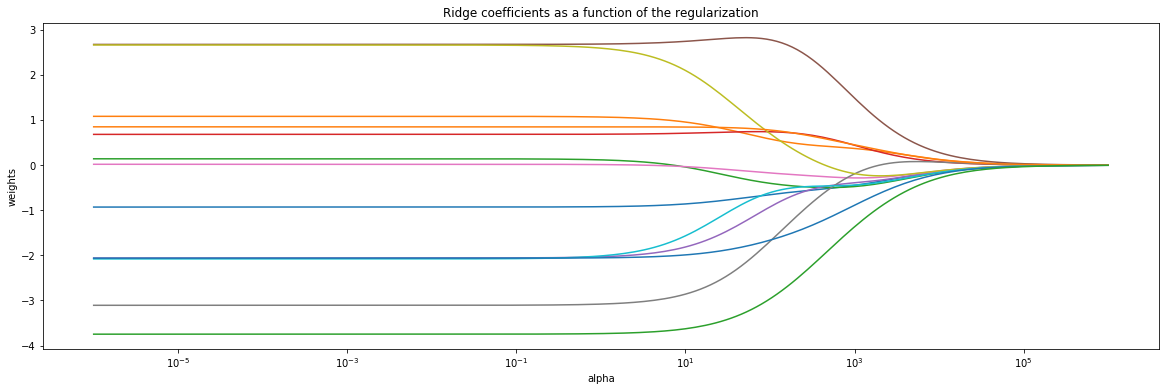

In [63]:
# now let's see how coefficients change over time
coefs = []

alphas = np.logspace(-6, 6, 200)

# Train the model with different regularisation strengths
for a in alphas:
    rreg.set_params(alpha=a)
    rreg.fit(X, y)
    coefs.append(rreg.coef_)

# Display results
plt.figure(figsize=(20, 6))
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')
plt.show()

In [64]:
rreg.coef_

array([-0.001798  ,  0.00166864, -0.00223928,  0.0008134 , -0.00197766,
        0.00322433, -0.00174432,  0.00115441, -0.0017657 , -0.00216887,
       -0.00235333,  0.00154435, -0.00341874])

In [67]:
alphas = np.logspace(-4, 4, 9)

rreg_scores = []

for alpha in alphas:
    rreg.set_params(alpha=alpha)
    scores = cross_val_score(estimator=rreg, X=X_train, y=y_train, cv=10)
    rreg_scores.append((np.mean(scores), alpha))

In [69]:
max(rreg_scores)

(0.7820647667994132, 10.0)

In [78]:
rreg.set_params(alpha=10)
rreg.fit(X_train, y_train)

Ridge(alpha=10, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [79]:
rreg.score(X_test, y_test)

0.6825821601357429

In [66]:
np.logspace(-4, 4, 9)

array([1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03,
       1.e+04])

In [70]:
from sklearn.linear_model import Lasso
lareg = Lasso()

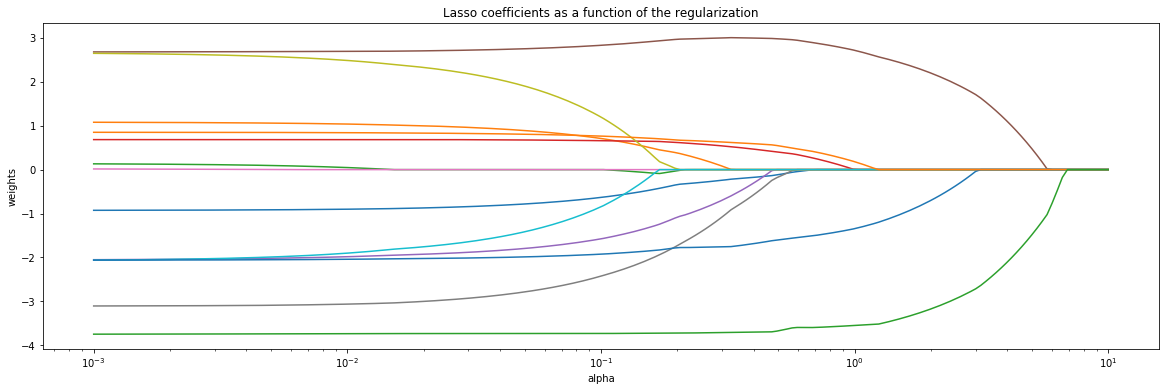

In [76]:
# now let's see how coefficients change over time
coefs = []

alphas = np.logspace(-3, 1, 200)

# Train the model with different regularisation strengths
for a in alphas:
    lareg.set_params(alpha=a)
    lareg.fit(X, y)
    coefs.append(lareg.coef_)

# Display results
plt.figure(figsize=(20, 6))
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Lasso coefficients as a function of the regularization')
plt.axis('tight')
plt.show()

In [73]:
alphas = np.logspace(-4, 4, 9)

lareg_scores = []

for alpha in alphas:
    lareg.set_params(alpha=alpha)
    scores = cross_val_score(estimator=lareg, X=X_train, y=y_train, cv=10)
    lareg_scores.append((np.mean(scores), alpha))

In [75]:
max(lareg_scores)

(0.7814572182231375, 0.001)

In [77]:
lareg.coef_

array([-0.,  0., -0.,  0., -0.,  0., -0.,  0., -0., -0., -0.,  0., -0.])